True

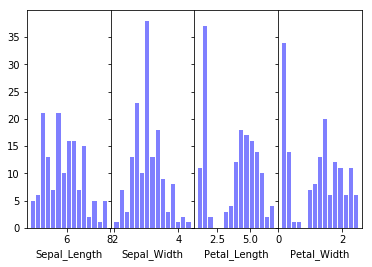

In [3]:
# 控制显示格式，将某些模块显示到同一行

# 导入所需模块
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from lxml import etree
import base64
import urllib


# 获取数据集，用 urllib 库下载 iris 数据集作为示例
url = "http://aima.cs.berkeley.edu/data/iris.csv"
setl = urllib.request.Request(url)
iris_p = urllib.request.urlopen(setl)
iris = pd.read_csv(iris_p, sep=',',decimal='.',header=None, names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species'])

# pandas 的 DataFrame 数据直接装换为 html 代码字符串
iris_des = """<div style="float:left"><h1>Iris Describe Stastic</h1>"""+iris.describe().T.to_html()+"</div>"

# matplotlib 任意绘制一张图
fig,axes = plt.subplots(1,4,sharey = True)
for n in range(4):
    axes[n].hist( iris.iloc[:,n],bins = 15,color = 'b',alpha = 0.5,rwidth= 0.8 )
    axes[n].set_xlabel(iris.columns[n])
plt.subplots_adjust(wspace = 0)
# figure 保存为二进制文件
buffer = BytesIO()
plt.savefig(buffer)  
plot_data = buffer.getvalue()

# 图像数据转化为 HTML 格式
imb = base64.b64encode(plot_data)  
#imb = plot_data.encode('base64')   # 对于 Python 2.7可用 
ims = imb.decode()
imd = "data:image/png;base64,"+ims
iris_im = """<div style="float:left"><h1>Iris Figure</h1>  """ + """<img src="%s"></div>""" % imd   

root = "<title>Iris Dataset</title>"
root = root + iris_des + iris_im  #将多个 html 格式的字符串连接起来

# lxml 库的 etree 解析字符串为 html 代码，并写入文件
html = etree.HTML(root)
tree = etree.ElementTree(html)
tree.write('iris.html')

# 最后使用默认浏览器打开 html 文件
import webbrowser
webbrowser.open('iris.html',new = 1)

True

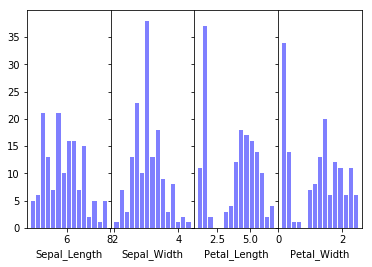

In [4]:
# 导入所需模块
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from lxml import etree
import base64
import urllib


# 获取数据集，用 urllib 库下载 iris 数据集作为示例
url = "http://aima.cs.berkeley.edu/data/iris.csv"
setl = urllib.request.Request(url)
iris_p = urllib.request.urlopen(setl)
iris = pd.read_csv(iris_p, sep=',',decimal='.',header=None, names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species'])

# pandas 的 DataFrame 数据直接装换为 html 代码字符串
iris_des = """<h1>Iris Describe Stastic</h1>"""+iris.describe().T.to_html()

# matplotlib 任意绘制一张图
fig,axes = plt.subplots(1,4,sharey = True)
for n in range(4):
    axes[n].hist( iris.iloc[:,n],bins = 15,color = 'b',alpha = 0.5,rwidth= 0.8 )
    axes[n].set_xlabel(iris.columns[n])
plt.subplots_adjust(wspace = 0)
# figure 保存为二进制文件
buffer = BytesIO()
plt.savefig(buffer)  
plot_data = buffer.getvalue()

# 图像数据转化为 HTML 格式
imb = base64.b64encode(plot_data)  
#imb = plot_data.encode('base64')   # 对于 Python 2.7可用 
ims = imb.decode()
imd = "data:image/png;base64,"+ims
iris_im = """<h1>Iris Figure</h1>  """ + """<img src="%s">""" % imd   

root = "<title>Iris Dataset</title>"
root = root + iris_des + iris_im  #将多个 html 格式的字符串连接起来

# lxml 库的 etree 解析字符串为 html 代码，并写入文件
html = etree.HTML(root)
tree = etree.ElementTree(html)
tree.write('iris.html')

# 最后使用默认浏览器打开 html 文件
import webbrowser
webbrowser.open('iris.html',new = 1)